In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:

# 1. Load the Data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 2. Understand the Data
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# 3. Check for Duplicates
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f'Duplicates removed: {duplicates}')

Duplicates removed: 1


In [6]:
# 4. Examine Data Types
categorical_columns = ['sex', 'smoker', 'region']
df[categorical_columns] = df[categorical_columns].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

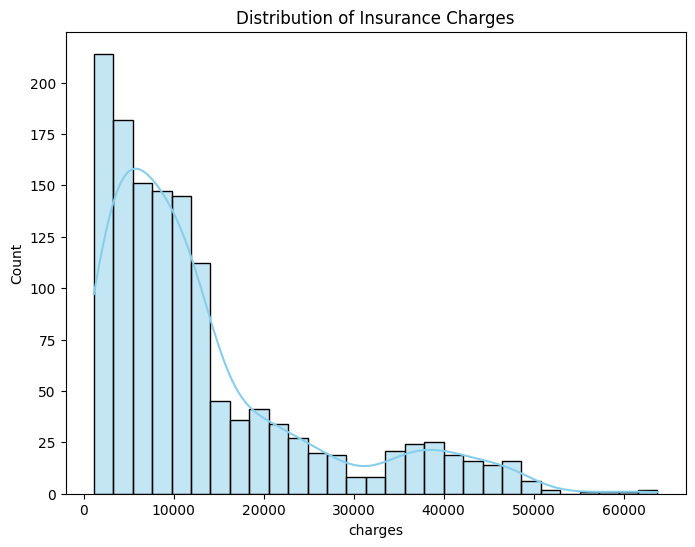

In [7]:
# 5. Visualize Target Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\2698636658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\2698636658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\2698636658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


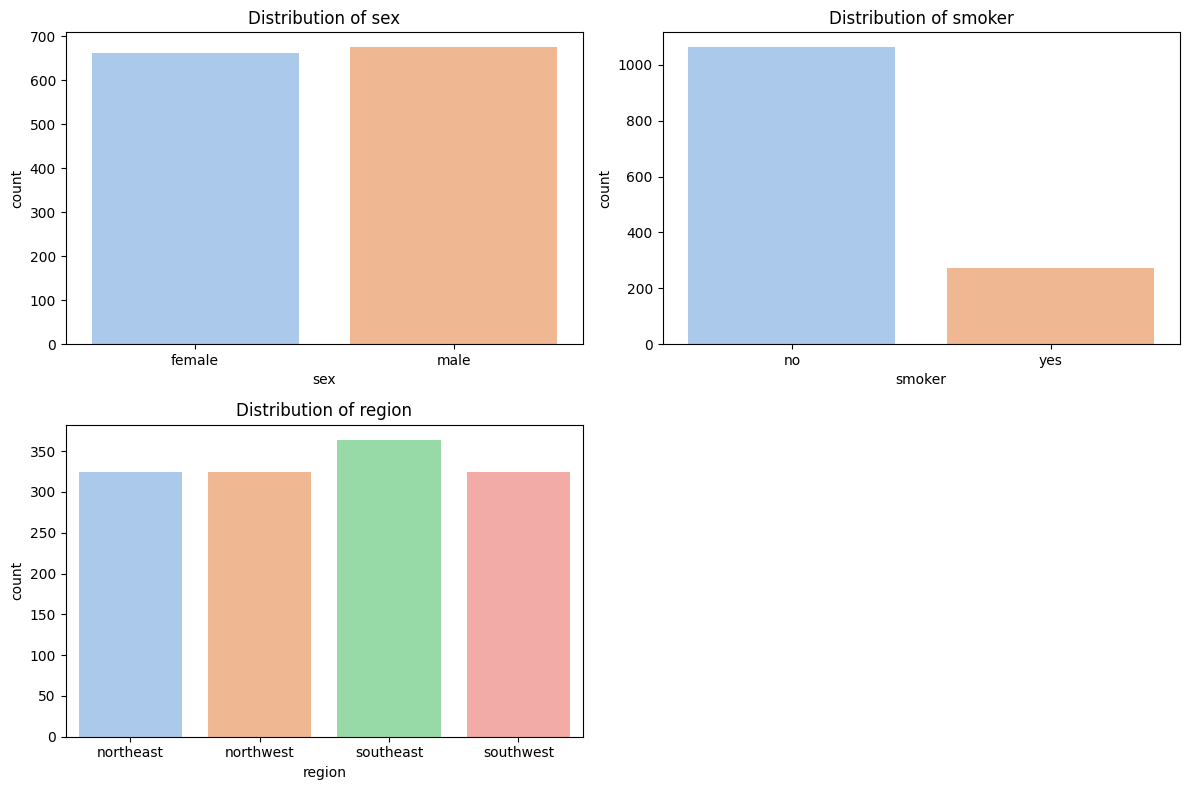

In [8]:
# 6. Categorical Feature Analysis
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

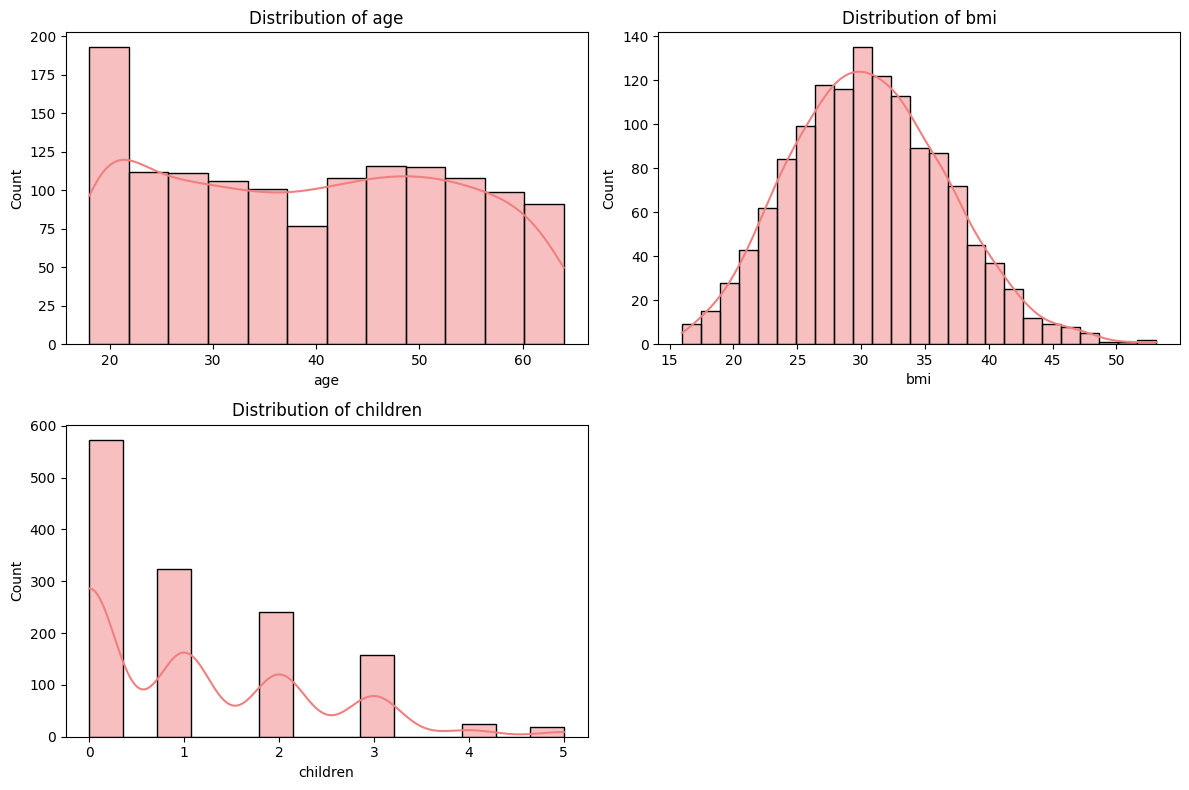

In [9]:
# 7. Numerical Feature Distribution
numerical_columns = ['age', 'bmi', 'children']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='lightcoral')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\736782999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\736782999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\736782999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


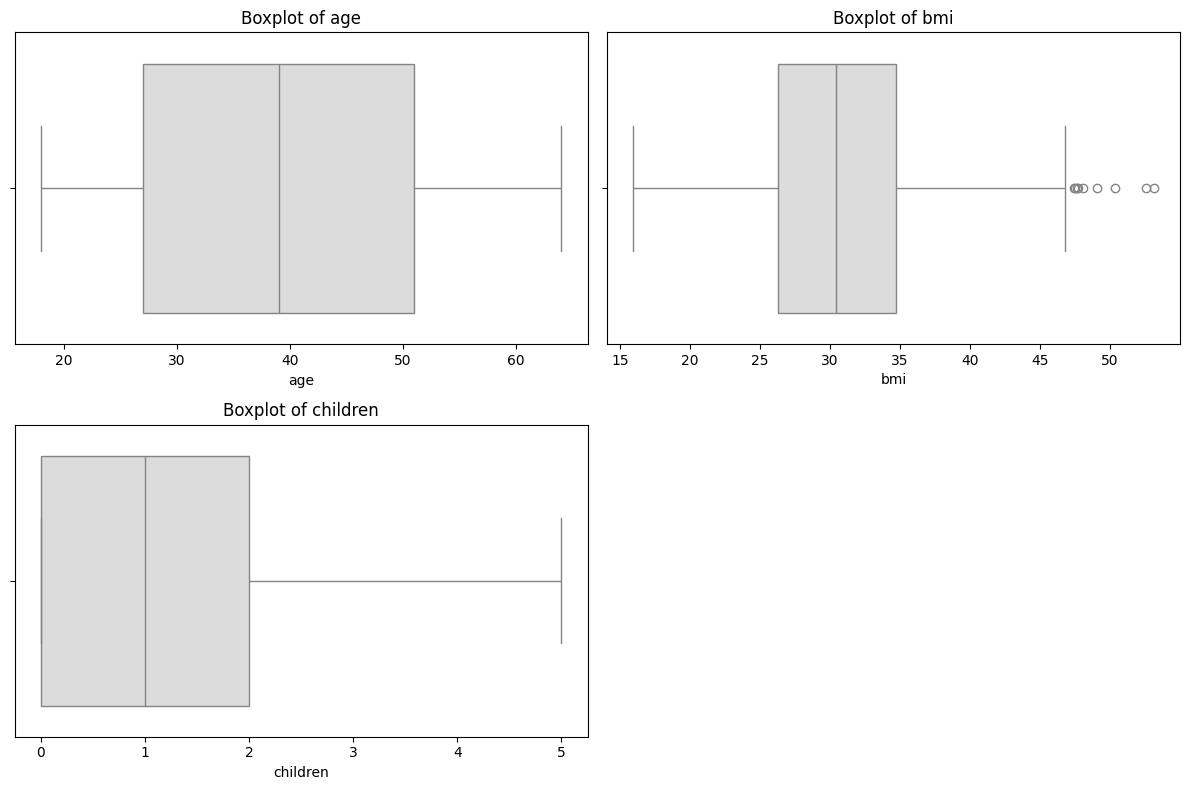

In [10]:
# 8. Box Plots to Check for Outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], palette='coolwarm')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


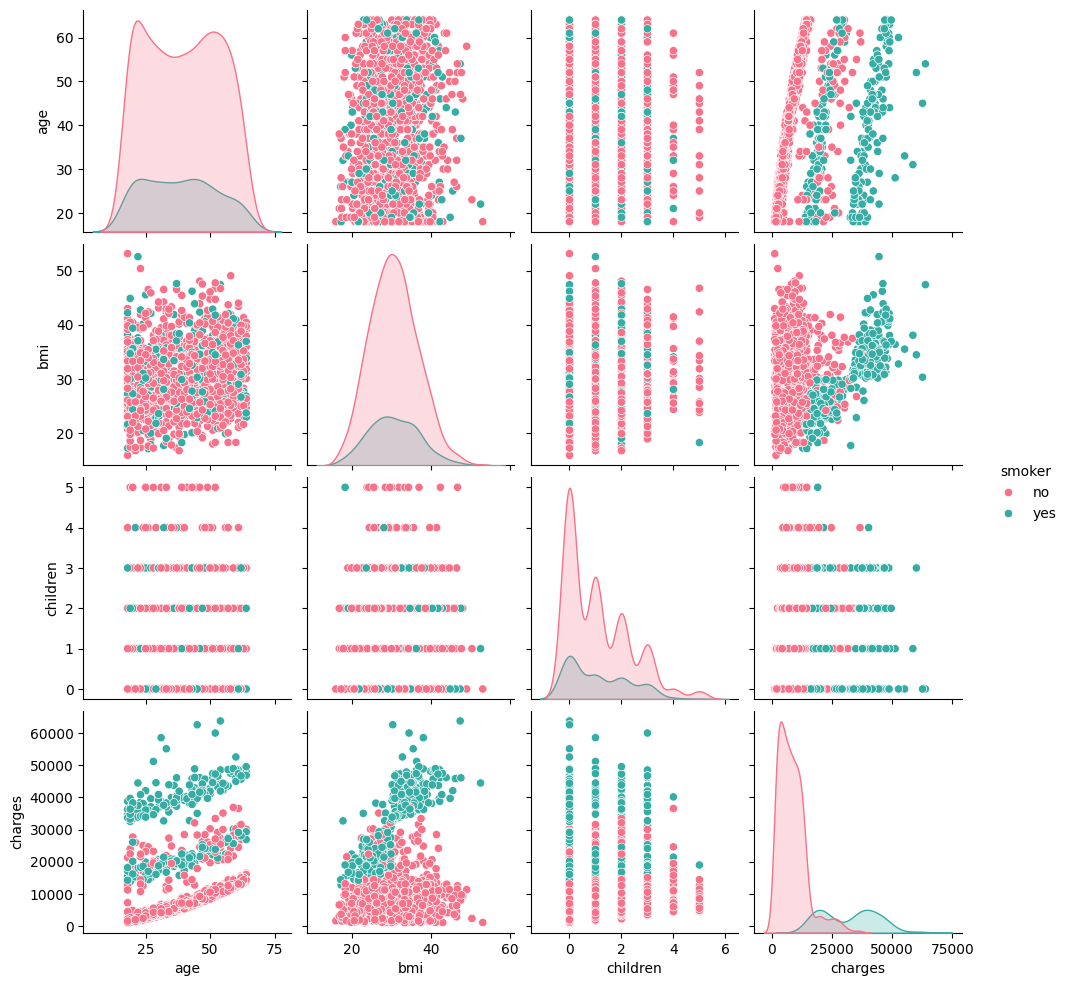

In [11]:
# 9. Pair Plot for Feature Relationships
sns.pairplot(df, hue='smoker', palette='husl')
plt.show()


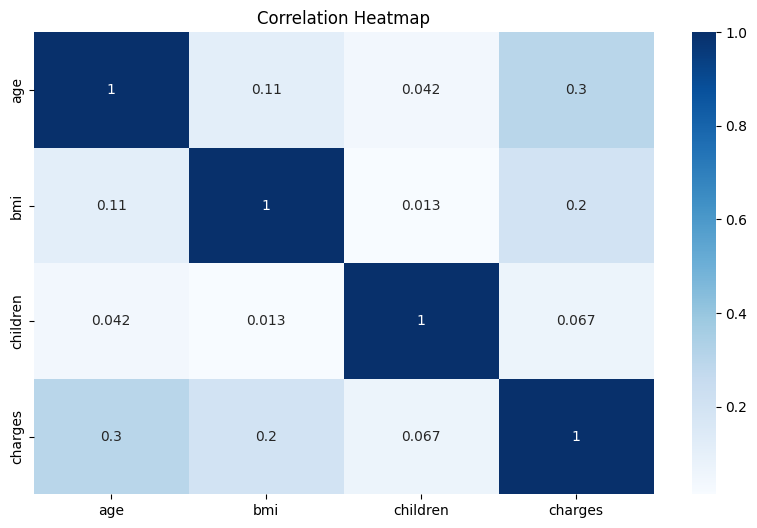

In [16]:
# 10. Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\3289128223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='muted')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\3289128223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='muted')
C:\Users\gaura\AppData\Local\Temp\ipykernel_14560\3289128223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=df, palette='muted')


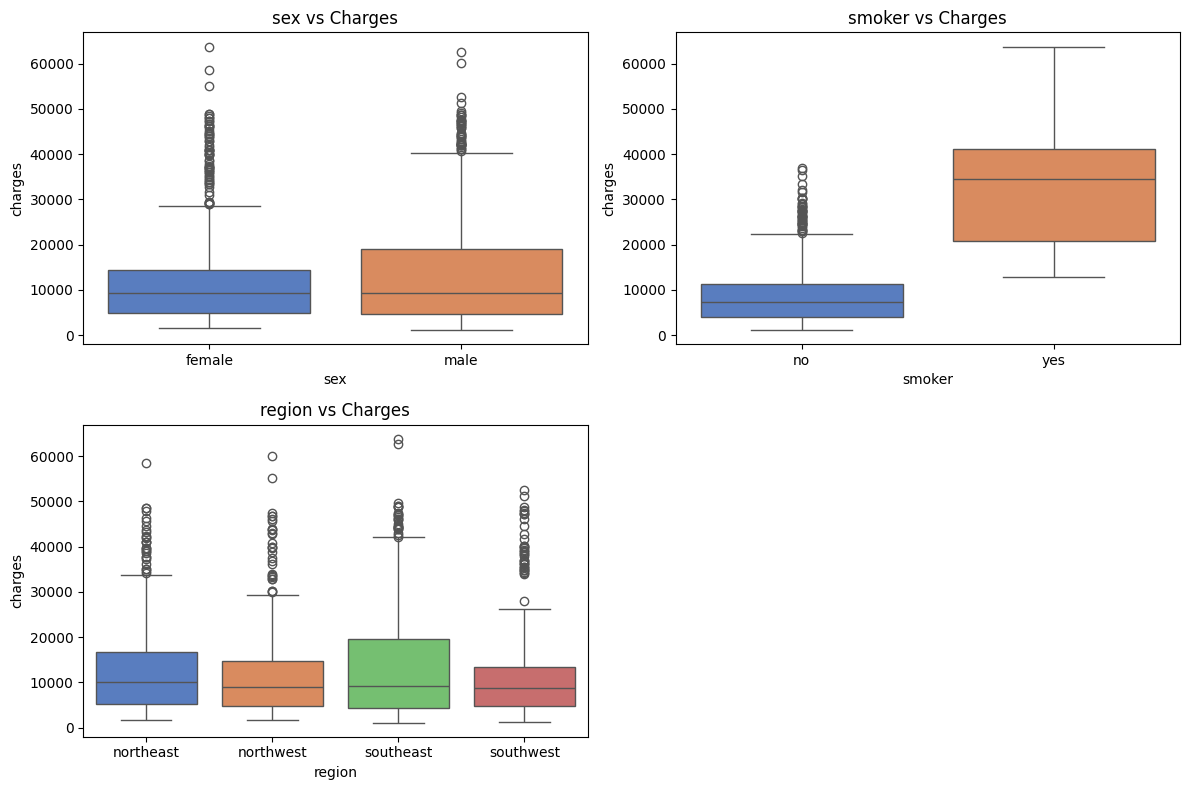

In [13]:
# 11. Relationship between Categorical and Target Variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=col, y='charges', data=df, palette='muted')
    plt.title(f'{col} vs Charges')
plt.tight_layout()
plt.show()


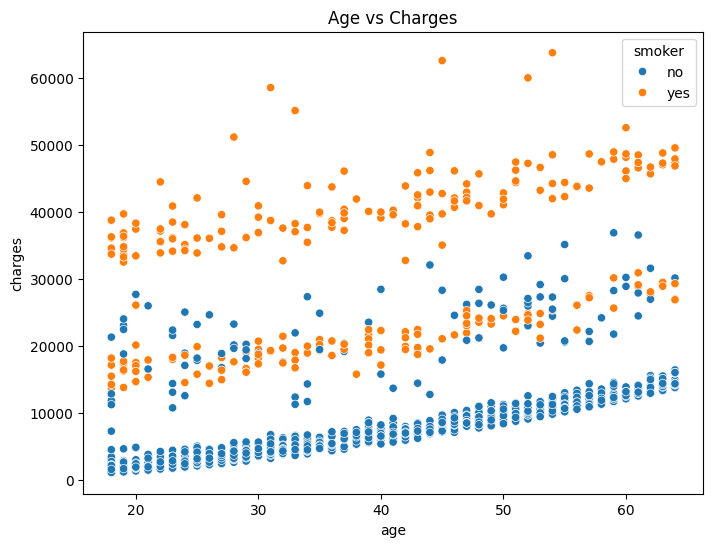

In [17]:
# 12. Age vs Charges (Trend Analysis)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges')
plt.show()

In [18]:
# 16. Check Skewness
skewness = df[numerical_columns].apply(lambda x: skew(x))
print(skewness)

age         0.054719
bmi         0.283596
children    0.936369
dtype: float64


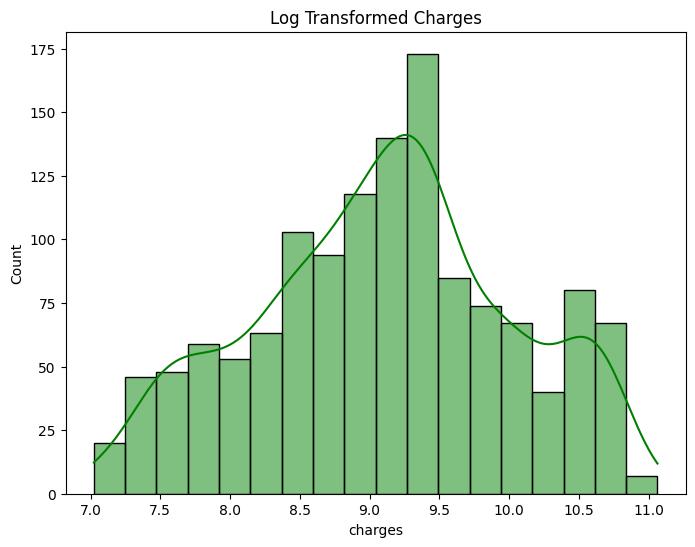

In [19]:
# 17. Log Transformation to Reduce Skewness
df['charges'] = np.log1p(df['charges'])
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='green')
plt.title('Log Transformed Charges')
plt.show()

In [20]:
# 18. Encoding Categorical Variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,False,True,False,False,True
1,18,33.770,1,7.453882,True,False,False,True,False
2,28,33.000,3,8.400763,True,False,False,True,False
3,33,22.705,0,9.998137,True,False,True,False,False
4,32,28.880,0,8.260455,True,False,True,False,False


In [21]:
# 19. Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,9.734236,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,7.453882,True,False,False,True,False
2,-0.799350,0.383155,1.580143,8.400763,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,9.998137,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,8.260455,True,False,True,False,False


In [22]:
# 20. Split Data for Model Training
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1069, 8) (268, 8)
